# Import Statements

In [1]:
import numpy as np
import pandas as pd

import os
import fnmatch
import copy

from matplotlib import rcParams
# rcParams['font.family'] = 'sans-serif'
# rcParams['font.sans-serif'] = ['Tahoma']
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
# rc('font', weight='bold')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Helper Functions

In [2]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def plot(figsize, red, redlabel, target, targetlabel, xlabel, ylabel, title, savefig=None):
    plt.figure(figsize=figsize)
    plt.plot(red['num_params'], red['acc'], label=redlabel, marker='o', c='C0')
    plt.axhline(target['acc'], ls='--', c='C1')
    plt.scatter(target['num_params'], target['acc'], label=targetlabel, s=350, c='C1')
    plt.xlabel(xlabel, fontsize=18)
    plt.xlim(max(red['num_params']), 0)
    plt.ylabel(ylabel, fontsize=18)
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=14)
    plt.grid(True)
    if savefig is None:
        plt.show()
    else:
        plt.savefig(savefig+'.png', dpi=300)

# Aggregate Results

## Read in Data

In [3]:
model_types = ['fc2', 'fc4', 'lenet5']
h = '500'

base = find('*.npz', './base2')

base_dict = {}
for m in model_types:
    base_dict[m] = {}
    base_dict[m]['num_params'] = np.array([int(np.load(path)['num_params']) for path in base 
                                           if (m in path) and (h in path)])
    base_dict[m]['acc'] = np.array([np.load(path)['test_acc'][-1] for path in base
                                    if (m in path) and (h in path)])
    idx = base_dict[m]['num_params'].argsort()
    base_dict[m]['num_params'] = base_dict[m]['num_params'][idx] / 1e3
    base_dict[m]['acc'] = base_dict[m]['acc'][idx]

In [4]:
model_types = ['fc2', 'fc4']
h = '500'

all_red = {}
all_red_relu = {}
all_prune = {}
for i in ['', '2', '3', '4', '5']:
    prune_path = './prune' + i
    red_path = './red' + i
    
    prune = find('*.npz', prune_path)
    red = find('*.npz', red_path)
    
    prune_dict = {}
    red_dict = {}
    red_relu_dict = {}
    for m in model_types:
        red_dict[m] = {}
        red_dict[m]['num_params'] = np.array([int(np.load(path)['num_params_remaining']) for path in red 
                                               if (m in path) and (h in path) and not ('relu' in path)])
        red_dict[m]['acc'] = np.array([np.load(path)['test_acc'][-1] for path in red
                                        if (m in path) and (h in path) and not ('relu' in path)])
        idx = red_dict[m]['num_params'].argsort()
        red_dict[m]['num_params'] = red_dict[m]['num_params'][idx] / 1e3
        red_dict[m]['acc'] = red_dict[m]['acc'][idx]

        red_relu_dict[m] = {}
        red_relu_dict[m]['num_params'] = np.array([int(np.load(path)['num_params_remaining']) for path in red 
                                               if (m in path) and (h in path) and ('relu' in path)])
        red_relu_dict[m]['acc'] = np.array([np.load(path)['test_acc'][-1] for path in red
                                        if (m in path) and (h in path) and ('relu' in path)])
        idx = red_relu_dict[m]['num_params'].argsort()
        red_relu_dict[m]['num_params'] = red_relu_dict[m]['num_params'][idx] / 1e3
        red_relu_dict[m]['acc'] = red_relu_dict[m]['acc'][idx]

        prune_dict[m] = {}
        prune_dict[m]['num_params'] = np.array([int(np.load(path)['num_params_remaining']) for path in prune 
                                               if (m in path) and (h in path)])
        prune_dict[m]['acc'] = np.array([np.load(path)['test_acc'][-1] for path in prune
                                        if (m in path) and (h in path)])
        idx = prune_dict[m]['num_params'].argsort()
        prune_dict[m]['num_params'] = prune_dict[m]['num_params'][idx] / 1e3
        prune_dict[m]['acc'] = prune_dict[m]['acc'][idx]
        
    all_red[i] = red_dict
    all_red_relu[i] = red_relu_dict
    all_prune[i] = prune_dict
    
model_types = ['prunelenet5', 'redlenet5']
h = '500'

all_lenet = {}
for i in ['', '2', '3', '4', '5']:
    lenet_path = './predlenet5' + i
    lenet = find('*.npz', lenet_path)

    lenet_dict = {}
    for m in model_types:
        lenet_dict[m] = {}
        lenet_dict[m]['num_params'] = np.array([int(np.load(path)['num_params_remaining']) for path in lenet 
                                               if ('/'+m in path) and (h in path) and not ('relu' in path)])
        lenet_dict[m]['acc'] = np.array([np.load(path)['test_acc'][-1] for path in lenet
                                        if ('/'+m in path) and (h in path) and not ('relu' in path)])
        idx = lenet_dict[m]['num_params'].argsort()
        lenet_dict[m]['num_params'] = lenet_dict[m]['num_params'][idx] / 1e3
        lenet_dict[m]['acc'] = lenet_dict[m]['acc'][idx]

        if m == 'redlenet5':
            lenet_dict[m+'_relu'] = {}
            lenet_dict[m+'_relu']['num_params'] = np.array([int(np.load(path)['num_params_remaining']) for path in lenet 
                                                           if ('/'+m in path) and (h in path) and ('relu' in path)])
            lenet_dict[m+'_relu']['acc'] = np.array([np.load(path)['test_acc'][-1] for path in lenet
                                                    if ('/'+m in path) and (h in path) and ('relu' in path)])
            idx = lenet_dict[m+'_relu']['num_params'].argsort()
            lenet_dict[m+'_relu']['num_params'] = lenet_dict[m+'_relu']['num_params'][idx] / 1e3
            lenet_dict[m+'_relu']['acc'] = lenet_dict[m+'_relu']['acc'][idx]
            
    all_lenet[i] = lenet_dict

In [10]:
final_prune = copy.deepcopy(all_prune[''])
final_red = copy.deepcopy(all_red[''])
final_red_relu = copy.deepcopy(all_red_relu[''])
final_lenet = copy.deepcopy(all_lenet[''])

model_types = ['fc2', 'fc4']

for i in ['2', '3', '4', '5']:
    for m in model_types:
        for j in range(len(all_prune[i][m]['acc'])):
            if all_prune[i][m]['acc'][j] > final_prune[m]['acc'][j]:
                final_prune[m]['acc'][j] = all_prune[i][m]['acc'][j]
            if all_red[i][m]['acc'][j] > final_red[m]['acc'][j]:
                final_red[m]['acc'][j] = all_red[i][m]['acc'][j]
            if all_red_relu[i][m]['acc'][j] > final_red_relu[m]['acc'][j]:
                final_red_relu[m]['acc'][j] = all_red_relu[i][m]['acc'][j]
                
model_types = ['prunelenet5', 'redlenet5', 'redlenet5_relu']

for i in ['2', '3', '4', '5']:
    for m in model_types:
        for j in range(len(all_lenet[i][m]['acc'])):
            if all_lenet[i][m]['acc'][j] > final_lenet[m]['acc'][j]:
                final_lenet[m]['acc'][j] = all_lenet[i][m]['acc'][j]

## Plot Results

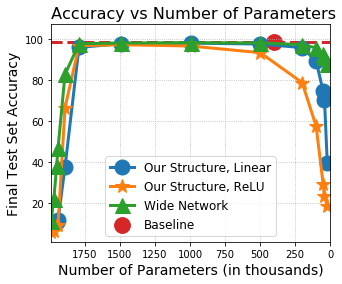

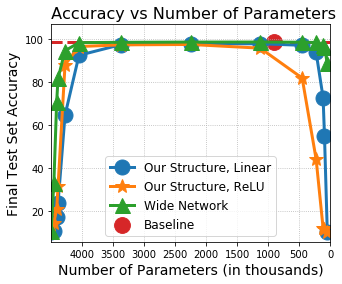

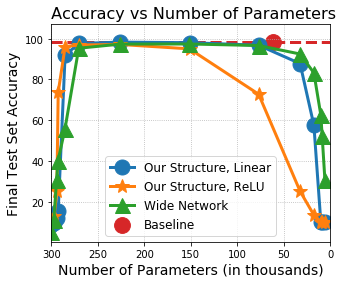

In [61]:
base_title = ' Accuracy vs Number of Parameters'
model_types = ['fc2', 'fc4']
size=(5, 4)
title_font=16
label_font=14
legend_font=12
dpi=600

for m in model_types:
    plt.figure(figsize=size)
    plt.axhline(base_dict[m]['acc'], linewidth=3, ls='--', c='C3')
    plt.plot(
        final_red[m]['num_params'],
        final_red[m]['acc'],
        label='Our Structure, Linear',
        marker='o',
        markersize=15,
        linewidth=3,
        c='C0'
    )
    plt.plot(
        final_red_relu[m]['num_params'],
        final_red_relu[m]['acc'],
        label='Our Structure, ReLU',
        marker='*',
        markersize=15,
        linewidth=3,
        c='C1'
    )
    plt.plot(
        final_prune[m]['num_params'],
        final_prune[m]['acc'],
        label='Wide Network',
        marker='^',
        markersize=15,
        linewidth=3,
        c='C2'
    )
    plt.scatter(base_dict[m]['num_params'], base_dict[m]['acc'], label='Baseline', c='C3', s=250)
    
    plt.xlabel('Number of Parameters (in thousands)', fontsize=label_font)
    plt.xlim(max(final_prune[m]['num_params']), 0)
    plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
    plt.title(base_title, fontsize=title_font)
    plt.legend(loc='best', fontsize=legend_font)
    plt.grid(True, linestyle=':')
    plt.savefig(m+'_final.png', dpi=dpi)

plt.figure(figsize=size)
plt.axhline(base_dict['lenet5']['acc'], linewidth=3, ls='--', c='C3')
plt.plot(
    final_lenet['redlenet5']['num_params'],
    final_lenet['redlenet5']['acc'],
    label='Our Structure, Linear',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    final_lenet['redlenet5_relu']['num_params'],
    final_lenet['redlenet5_relu']['acc'],
    label='Our Structure, ReLU',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
plt.plot(
    final_lenet['prunelenet5']['num_params'],
    final_lenet['prunelenet5']['acc'],
    label='Wide Network',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.scatter(base_dict['lenet5']['num_params'], base_dict['lenet5']['acc'], label='Baseline', c='C3', s=250)

plt.xlabel('Number of Parameters (in thousands)', fontsize=label_font)
plt.xlim(max(final_lenet['prunelenet5']['num_params']), 0)
plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
plt.title(base_title, fontsize=title_font)
plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')
plt.savefig('LeNet5_final.png', dpi=dpi)

## Accuracy Vs Epochs

In [3]:
low_sparsity_id = 's0.1_'
med_sparsity_id = 's0.5_'
high_sparsity_id = 's0.95_'
hidden_size_id = 'h500'

model_types = ['fc2', 'fc4', 'lenet5', 'redfc2', 'redfc4', 'widefc2', 'widefc4', 'redlenet5', 'widelenet5']

epoch_dict = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15,
              16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 30, 22: 50, 23: 100}

# make results dictionary
results = {}
for sparsity_id in [low_sparsity_id, med_sparsity_id, high_sparsity_id]:
    results[sparsity_id] = {}
    for m in model_types:
        results[sparsity_id][m] = {}
        results[sparsity_id][m]['acc'] = [np.nan] * len(epoch_dict)
        results[sparsity_id][m]['epochs'] = [np.nan] * len(epoch_dict)
        if 'red' in m:
            results[sparsity_id][m+'_relu'] = {}
            results[sparsity_id][m+'_relu']['acc'] = [np.nan] * len(epoch_dict)
            results[sparsity_id][m+'_relu']['epochs'] = [np.nan] * len(epoch_dict)
            
# populate results dictionary
for sparsity_id in [low_sparsity_id, med_sparsity_id, high_sparsity_id]:
    for m in model_types:
        path = './results/'+m
        files = find('*.npz', path)
        for i in range(1, len(epoch_dict)+1):
            epoch_id = 'e'+str(epoch_dict[i])+'_'
            for file in files:
                if m in ['fc2', 'fc4', 'lenet5']:
                    if (hidden_size_id in file) and ('/'+m in file) and (epoch_id in file):
                        results[sparsity_id][m]['acc'][i-1] = np.load(file)['test_acc'][-1]
                        results[sparsity_id][m]['epochs'][i-1] = epoch_dict[i]
                elif (sparsity_id in file) and (hidden_size_id in file) and ('/'+m in file) and (epoch_id in file):
                    if '_relu' in file:
                        model = m+'_relu'
                    else:
                        model = m
                    results[sparsity_id][model]['acc'][i-1] = np.load(file)['test_acc'][-1]
                    results[sparsity_id][model]['epochs'][i-1] = epoch_dict[i]

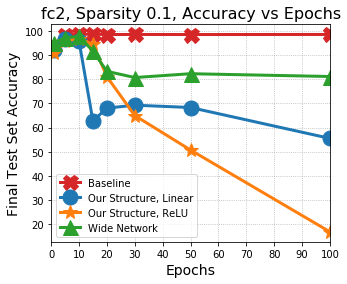

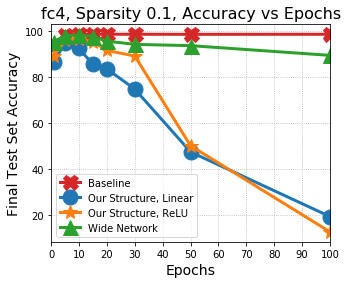

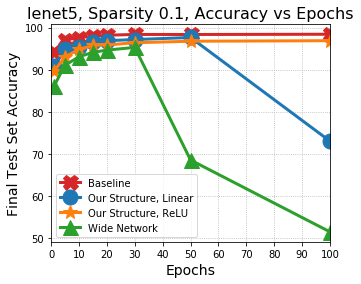

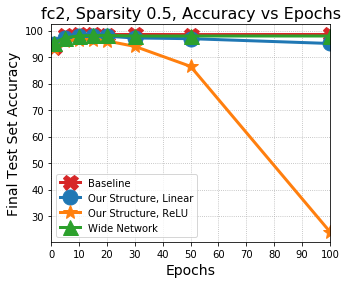

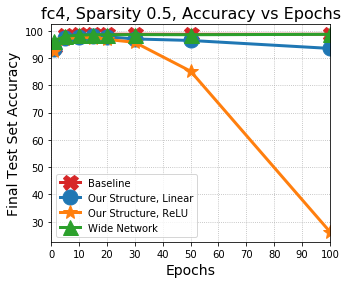

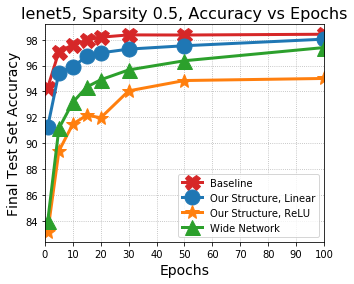

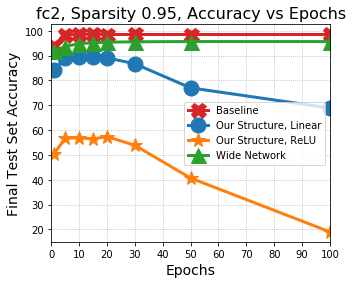

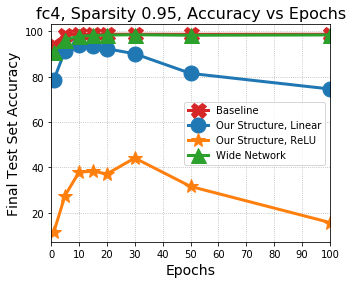

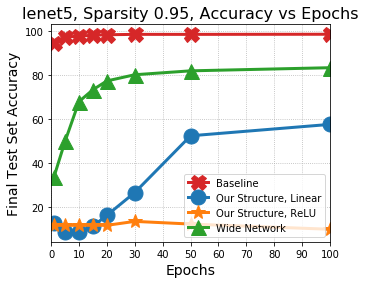

In [4]:
base_title = 'Accuracy vs Epochs'
model_types = ['fc2', 'fc4', 'lenet5']
size=(5, 4)
title_font=16
label_font=14
legend_font=10
dpi=600

for sparsity_id in [low_sparsity_id, med_sparsity_id, high_sparsity_id]:
    for m in model_types:
        plt.figure(figsize=size)
        temp = results[sparsity_id][m]
        plt.plot(
            [temp['epochs'][0]] + temp['epochs'][4::5] + temp['epochs'][20:],
            [temp['acc'][0]] + temp['acc'][4::5] + temp['acc'][20:],
            label='Baseline',
            marker='X',
            markersize=15,
            linewidth=3,
            c='C3'
        )
        temp = results[sparsity_id]['red'+m]
        plt.plot(
            [temp['epochs'][0]] + temp['epochs'][4::5] + temp['epochs'][20:],
            [temp['acc'][0]] + temp['acc'][4::5] + temp['acc'][20:],
            label='Our Structure, Linear',
            marker='o',
            markersize=15,
            linewidth=3,
            c='C0'
        )
        temp = results[sparsity_id]['red'+m+'_relu']
        plt.plot(
            [temp['epochs'][0]] + temp['epochs'][4::5] + temp['epochs'][20:],
            [temp['acc'][0]] + temp['acc'][4::5] + temp['acc'][20:],
            label='Our Structure, ReLU',
            marker='*',
            markersize=15,
            linewidth=3,
            c='C1'
        )
        temp = results[sparsity_id]['wide'+m]
        plt.plot(
            [temp['epochs'][0]] + temp['epochs'][4::5] + temp['epochs'][20:],
            [temp['acc'][0]] + temp['acc'][4::5] + temp['acc'][20:],
            label='Wide Network',
            marker='^',
            markersize=15,
            linewidth=3,
            c='C2'
        )

        plt.xlabel('Epochs', fontsize=label_font)
        plt.xlim(1, 100)
        plt.xticks(np.arange(start=0, stop=101, step=10))
        plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
        plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
        plt.legend(loc='best', fontsize=legend_font)
        plt.grid(True, linestyle=':')
        plt.savefig(m+'_'+sparsity_id[:-1]+'.png', dpi=dpi)

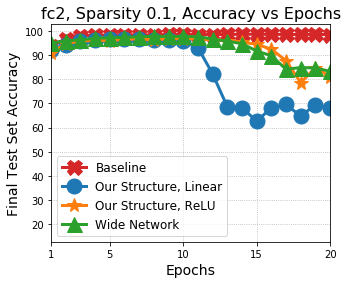

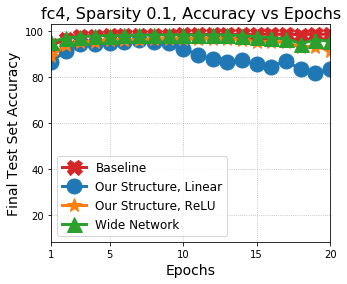

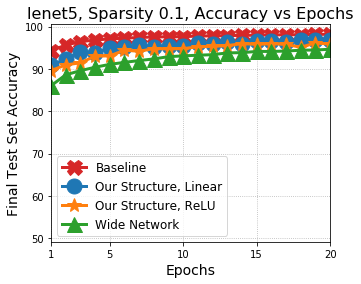

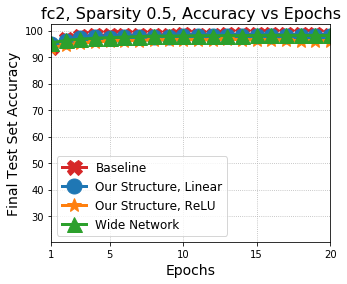

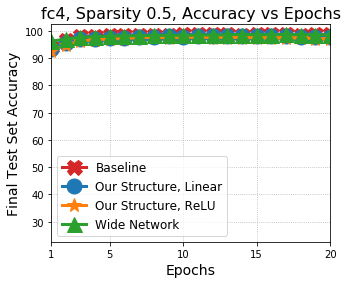

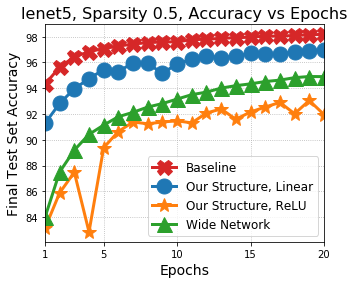

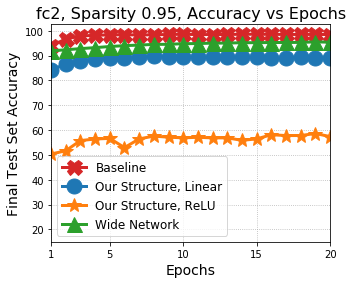

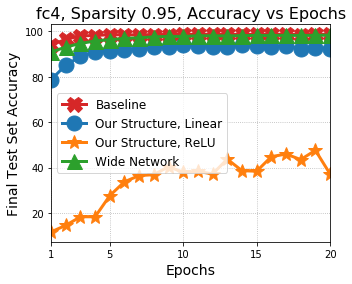

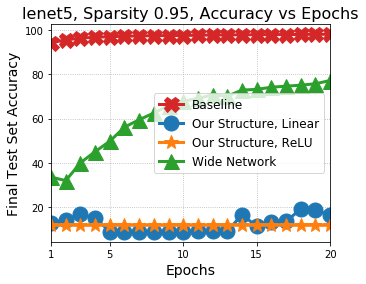

In [26]:
base_title = 'Accuracy vs Epochs'
model_types = ['fc2', 'fc4', 'lenet5']
size=(5, 4)
title_font=16
label_font=14
legend_font=12
dpi=600

for sparsity_id in [low_sparsity_id, med_sparsity_id, high_sparsity_id]:
    for m in model_types:
        plt.figure(figsize=size)
        plt.plot(
            results[sparsity_id][m]['epochs'],
            results[sparsity_id][m]['acc'],
            label='Baseline',
            marker='X',
            markersize=15,
            linewidth=3,
            c='C3'
        )
        plt.plot(
            results[sparsity_id]['red'+m]['epochs'],
            results[sparsity_id]['red'+m]['acc'],
            label='Our Structure, Linear',
            marker='o',
            markersize=15,
            linewidth=3,
            c='C0'
        )
        plt.plot(
            results[sparsity_id]['red'+m+'_relu']['epochs'],
            results[sparsity_id]['red'+m+'_relu']['acc'],
            label='Our Structure, ReLU',
            marker='*',
            markersize=15,
            linewidth=3,
            c='C1'
        )
        plt.plot(
            results[sparsity_id]['wide'+m]['epochs'],
            results[sparsity_id]['wide'+m]['acc'],
            label='Wide Network',
            marker='^',
            markersize=15,
            linewidth=3,
            c='C2'
        )

        plt.xlabel('Epochs', fontsize=label_font)
        plt.xlim(1, 20)
        plt.xticks([1, 5, 10, 15, 20])
        plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
        plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
        plt.legend(loc='best', fontsize=legend_font)
        plt.grid(True, linestyle=':')
        plt.savefig(m+'_'+sparsity_id+'.png', dpi=dpi)

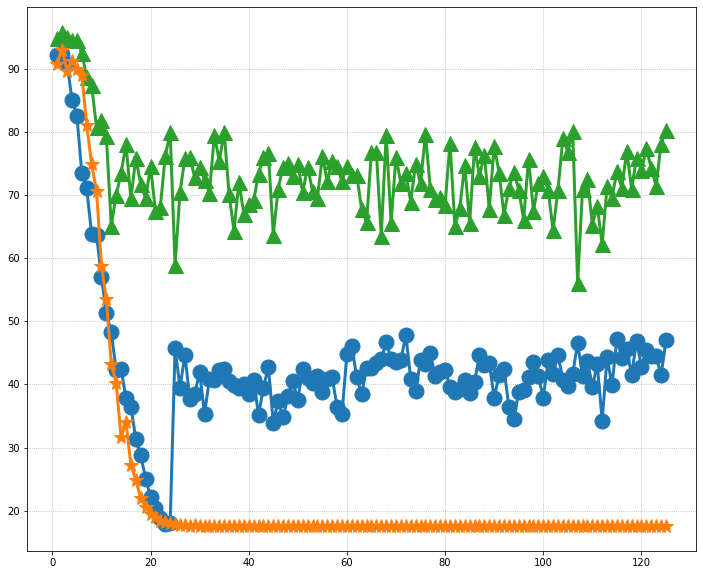

In [9]:
num_epochs = 125
r5_s1 = np.load('./results/widefc2/r5_s0.1_e'+str(num_epochs)+'_h500.npz')
red_r5_s1 = np.load('./results/redfc2/r5_s0.1_e'+str(num_epochs)+'_h500.npz')
red_r5_s1_relu = np.load('./results/redfc2/r5_s0.1_e'+str(num_epochs)+'_h500_relu.npz')

plt.figure(figsize=(12, 10))
plt.plot(
    np.arange(1, num_epochs+1),
    r5_s1['test_acc'],
    label='Baseline',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s1['test_acc'],
    label='Baseline',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s1_relu['test_acc'],
    label='Baseline',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
# plt.xlabel('Epochs', fontsize=label_font)
# plt.xlim(1, 20)
# plt.ylim(85, 100)
# plt.xticks([1, 5, 10, 15, 20])
# plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
# plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
# plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')

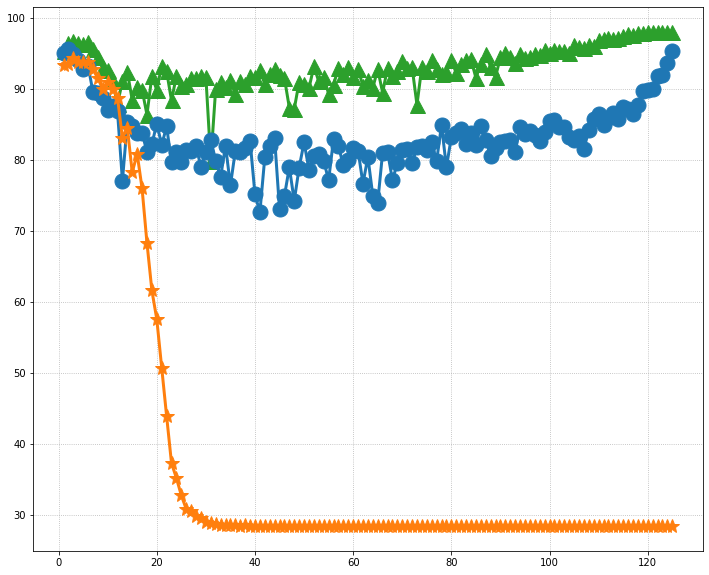

In [16]:
num_epochs = 125
r5_s5 = np.load('./results/widefc2/r5_s0.5_e'+str(num_epochs)+'_h500.npz')
red_r5_s5 = np.load('./results/redfc2/r5_s0.5_e'+str(num_epochs)+'_h500.npz')
red_r5_s5_relu = np.load('./results/redfc2/r5_s0.5_e'+str(num_epochs)+'_h500_relu.npz')

plt.figure(figsize=(12, 10))
plt.plot(
    np.arange(1, num_epochs+1),
    r5_s5['test_acc'],
    label='Baseline',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s5['test_acc'],
    label='Baseline',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s5_relu['test_acc'],
    label='Baseline',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
# plt.xlabel('Epochs', fontsize=label_font)
# plt.xlim(1, 20)
# plt.ylim(85, 100)
# plt.xticks([1, 5, 10, 15, 20])
# plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
# plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
# plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')

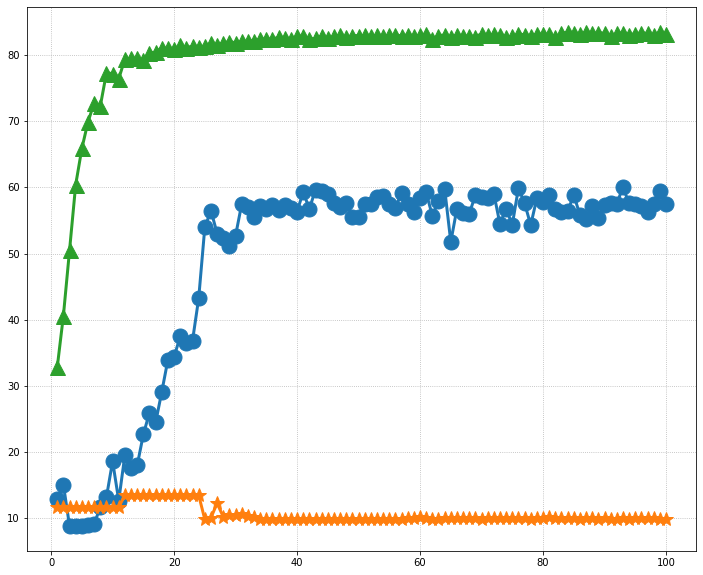

In [3]:
num_epochs = 100
r5_s95 = np.load('./results/widelenet5/r5_s0.95_e'+str(num_epochs)+'_h500.npz')
red_r5_s95 = np.load('./results/redlenet5/r5_s0.95_e'+str(num_epochs)+'_h500.npz')
red_r5_s95_relu = np.load('./results/redlenet5/r5_s0.95_e'+str(num_epochs)+'_h500_relu.npz')

plt.figure(figsize=(12, 10))
plt.plot(
    np.arange(1, num_epochs+1),
    r5_s95['test_acc'],
    label='Baseline',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s95['test_acc'],
    label='Baseline',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    np.arange(1, num_epochs+1),
    red_r5_s95_relu['test_acc'],
    label='Baseline',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
# plt.xlabel('Epochs', fontsize=label_font)
# plt.xlim(1, 20)
# plt.ylim(85, 100)
# plt.xticks([1, 5, 10, 15, 20])
# plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
# plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
# plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')

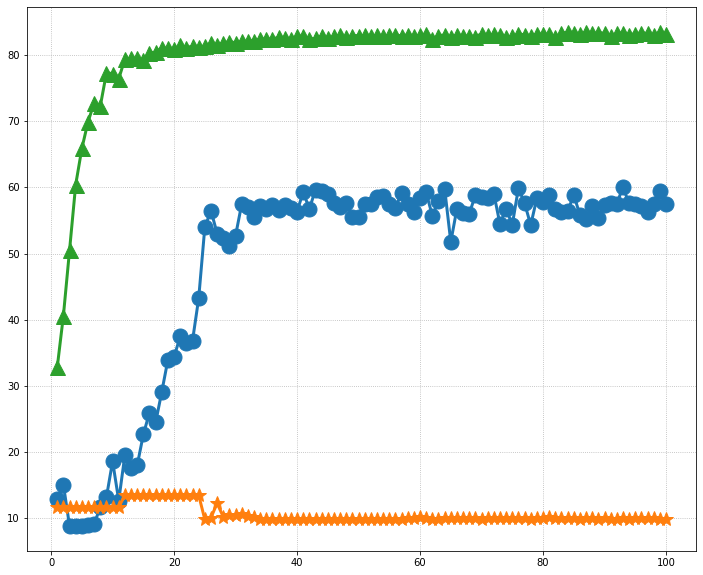

In [38]:
r5_s95 = np.load('./results/r5_s0.95_e100_h500.npz')
red_r5_s95 = np.load('./results/red/r5_s0.95_e100_h500.npz')
red_r5_s95_relu = np.load('./results/red/r5_s0.95_e100_h500_relu.npz')

plt.figure(figsize=(12, 10))
plt.plot(
    np.arange(1, 101),
    r5_s95['test_acc'],
    label='Baseline',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.plot(
    np.arange(1, 101),
    red_r5_s95['test_acc'],
    label='Baseline',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    np.arange(1, 101),
    red_r5_s95_relu['test_acc'],
    label='Baseline',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
# plt.xlabel('Epochs', fontsize=label_font)
# plt.xlim(1, 20)
# plt.ylim(85, 100)
# plt.xticks([1, 5, 10, 15, 20])
# plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
# plt.title(m + ', Sparsity ' + sparsity_id[1:-1] + ', ' + base_title, fontsize=title_font)
# plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')

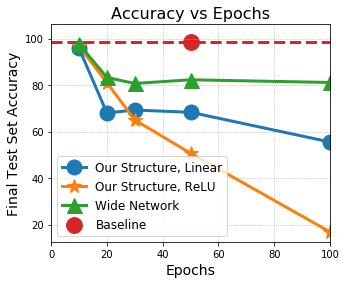

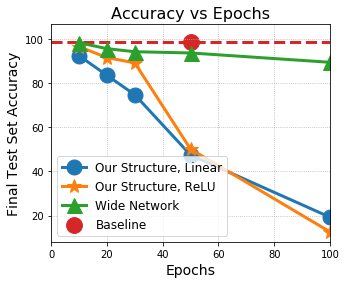

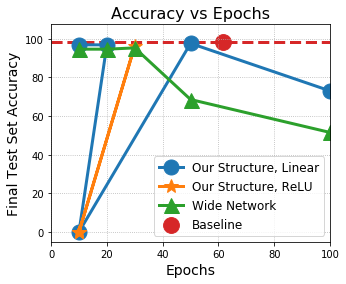

In [75]:
base_title = 'Accuracy vs Epochs'
model_types = ['fc2', 'fc4']
size=(5, 4)
title_font=16
label_font=14
legend_font=12
dpi=600

for m in model_types:
    plt.figure(figsize=size)
    plt.axhline(base_dict[m]['acc'], linewidth=3, ls='--', c='C3')
    plt.plot(
        epochs_red[m]['epochs'],
        epochs_red[m]['acc'],
        label='Our Structure, Linear',
        marker='o',
        markersize=15,
        linewidth=3,
        c='C0'
    )
    plt.plot(
        epochs_red_relu[m]['epochs'],
        epochs_red_relu[m]['acc'],
        label='Our Structure, ReLU',
        marker='*',
        markersize=15,
        linewidth=3,
        c='C1'
    )
    plt.plot(
        epochs_prune[m]['epochs'],
        epochs_prune[m]['acc'],
        label='Wide Network',
        marker='^',
        markersize=15,
        linewidth=3,
        c='C2'
    )
    plt.scatter(50, base_dict[m]['acc'], label='Baseline', c='C3', s=250)
    
    plt.xlabel('Epochs', fontsize=label_font)
    plt.xlim(0, 100)
    plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
    plt.title(base_title, fontsize=title_font)
    plt.legend(loc='best', fontsize=legend_font)
    plt.grid(True, linestyle=':')
    plt.savefig(m+'_low_sparsity.png', dpi=dpi)

plt.figure(figsize=size)
plt.axhline(base_dict['lenet5']['acc'], linewidth=3, ls='--', c='C3')
plt.plot(
    epochs_lenet['redlenet5']['epochs'],
    epochs_lenet['redlenet5']['acc'],
    label='Our Structure, Linear',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    epochs_lenet['redlenet5_relu']['epochs'],
    epochs_lenet['redlenet5_relu']['acc'],
    label='Our Structure, ReLU',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
plt.plot(
    epochs_lenet['prunelenet5']['epochs'],
    epochs_lenet['prunelenet5']['acc'],
    label='Wide Network',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.scatter(base_dict['lenet5']['num_params'], base_dict['lenet5']['acc'], label='Baseline', c='C3', s=250)

plt.xlabel('Epochs', fontsize=label_font)
plt.xlim(0, 100)
plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
plt.title(base_title, fontsize=title_font)
plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')
# plt.savefig('LeNet5_final.png', dpi=dpi)

## high sparsity

In [21]:
low_sparsity_idx = 's0.1_'
med_sparsity_idx = 's0.5_'
high_sparsity_idx = 's0.98_'
h = 'h500'

idx = high_sparsity_idx

model_types = ['fc2', 'fc4']

epochs_prune = {
    'fc2': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    },
    'fc4': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    }
}
epochs_red = {
    'fc2': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    },
    'fc4': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    }
}
epochs_red_relu = {
    'fc2': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    },
    'fc4': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    }
}
epochs_lenet = {
    'prunelenet5': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    },
    'redlenet5': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    },
    'redlenet5_relu': {
        'acc': [0] * 5,
        'epochs': [10] * 5
    }
}

exp_to_idx = {
    '': 0,
    '2': 3,
    '3': 4,
    '4': 1,
    '5': 2
}

exp_to_epoch = {
    '': 10,
    '2': 50,
    '3': 100,
    '4': 20,
    '5': 30
}

for i in ['', '2', '3', '4', '5']:
    prune_path = './prune' + i
    red_path = './red' + i
    
    prune = find('*.npz', prune_path)
    red = find('*.npz', red_path)
    for m in model_types:
        for file in prune:
            if (idx in file) and (h in file) and (m in file):
                ppath = file
        epochs_prune[m]['acc'][exp_to_idx[i]] = np.load(ppath)['test_acc'][-1]
        epochs_prune[m]['epochs'][exp_to_idx[i]] = exp_to_epoch[i]
        
        for file in red:
            if (idx in file) and ('relu' not in file) and (h in file) and (m in file):
                rpath = file
        epochs_red[m]['acc'][exp_to_idx[i]] = np.load(rpath)['test_acc'][-1]
        epochs_red[m]['epochs'][exp_to_idx[i]] = exp_to_epoch[i]
        
        for file in red:
            if (idx in file) and ('relu' in file) and (h in file) and (m in file):
                rrpath = file
        epochs_red_relu[m]['acc'][exp_to_idx[i]] = np.load(rrpath)['test_acc'][-1]
        epochs_red_relu[m]['epochs'][exp_to_idx[i]] = exp_to_epoch[i]
                
model_types = ['prunelenet5', 'redlenet5', 'redlenet5_relu']

for i in ['', '2', '3', '4', '5']:
    lenet_path = './predlenet5' + i
    lenet = find('*.npz', lenet_path)
    for m in model_types:
        for file in lenet:
            if (idx in file) and ('/'+m+'/' in file) and (h in file):
                if 'relu' in file:
                    model = m+'_relu'
                else:
                    model = m
                path = file
        epochs_lenet[model]['acc'][exp_to_idx[i]] = np.load(path)['test_acc'][-1]
        epochs_lenet[model]['epochs'][exp_to_idx[i]] = exp_to_epoch[i]

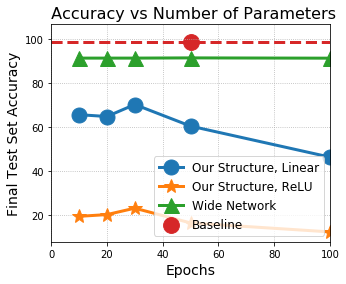

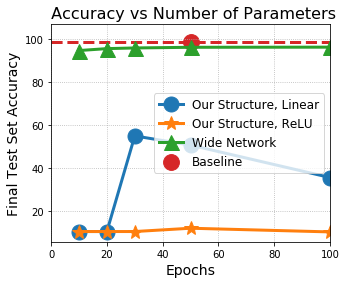

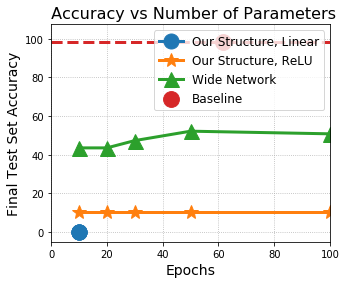

In [22]:
base_title = ' Accuracy vs Number of Parameters'
model_types = ['fc2', 'fc4']
size=(5, 4)
title_font=16
label_font=14
legend_font=12
dpi=600

for m in model_types:
    plt.figure(figsize=size)
    plt.axhline(base_dict[m]['acc'], linewidth=3, ls='--', c='C3')
    plt.plot(
        epochs_red[m]['epochs'],
        epochs_red[m]['acc'],
        label='Our Structure, Linear',
        marker='o',
        markersize=15,
        linewidth=3,
        c='C0'
    )
    plt.plot(
        epochs_red_relu[m]['epochs'],
        epochs_red_relu[m]['acc'],
        label='Our Structure, ReLU',
        marker='*',
        markersize=15,
        linewidth=3,
        c='C1'
    )
    plt.plot(
        epochs_prune[m]['epochs'],
        epochs_prune[m]['acc'],
        label='Wide Network',
        marker='^',
        markersize=15,
        linewidth=3,
        c='C2'
    )
    plt.scatter(50, base_dict[m]['acc'], label='Baseline', c='C3', s=250)
    
    plt.xlabel('Epochs', fontsize=label_font)
    plt.xlim(0, 100)
    plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
    plt.title(base_title, fontsize=title_font)
    plt.legend(loc='best', fontsize=legend_font)
    plt.grid(True, linestyle=':')
    plt.savefig(m+'_high_sparsity.png', dpi=dpi)

plt.figure(figsize=size)
plt.axhline(base_dict['lenet5']['acc'], linewidth=3, ls='--', c='C3')
plt.plot(
    epochs_lenet['redlenet5']['epochs'],
    epochs_lenet['redlenet5']['acc'],
    label='Our Structure, Linear',
    marker='o',
    markersize=15,
    linewidth=3,
    c='C0'
)
plt.plot(
    epochs_lenet['redlenet5_relu']['epochs'],
    epochs_lenet['redlenet5_relu']['acc'],
    label='Our Structure, ReLU',
    marker='*',
    markersize=15,
    linewidth=3,
    c='C1'
)
plt.plot(
    epochs_lenet['prunelenet5']['epochs'],
    epochs_lenet['prunelenet5']['acc'],
    label='Wide Network',
    marker='^',
    markersize=15,
    linewidth=3,
    c='C2'
)
plt.scatter(base_dict['lenet5']['num_params'], base_dict['lenet5']['acc'], label='Baseline', c='C3', s=250)

plt.xlabel('Epochs', fontsize=label_font)
plt.xlim(0, 100)
plt.ylabel('Final Test Set Accuracy', fontsize=label_font)
plt.title(base_title, fontsize=title_font)
plt.legend(loc='best', fontsize=legend_font)
plt.grid(True, linestyle=':')
# plt.savefig('LeNet5_final.png', dpi=dpi)